In [4]:
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# stats models: regression fitting
import statsmodels.formula.api as smf
# data visualization
import seaborn as sns

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916


<AxesSubplot:xlabel='totwrk', ylabel='sleep'>

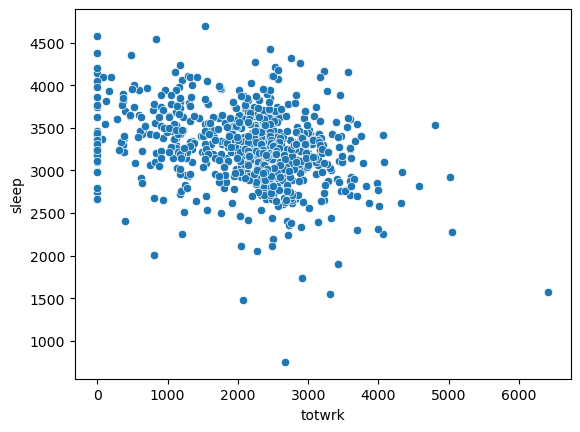

In [6]:
sns.scatterplot(data=df, y='sleep', x='totwrk')

<AxesSubplot:xlabel='totwrk', ylabel='sleep'>

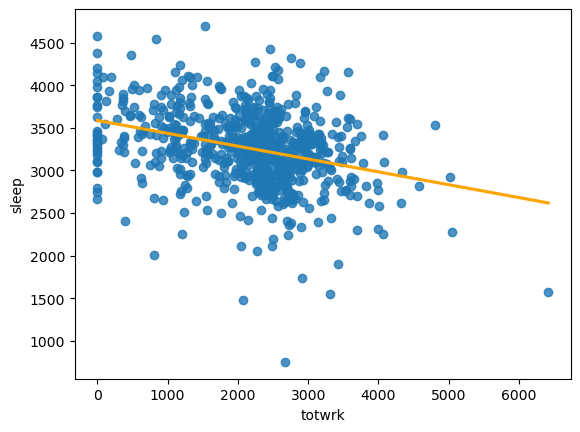

In [7]:
sns.regplot(data=df, y='sleep', x='totwrk', ci=None, line_kws={"color": "orange"})

In [13]:
# подгонка прямой
fitted_line = smf.ols(formula='sleep~totwrk', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

Intercept    3586.38
totwrk         -0.15
dtype: float64

# спецификация 2.1.1
$$
sleep = 3586.38 - 0.15* totwork
$$
каждая минута работы уменьшает количество сна на 0.15 минут в неделю 


In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df.shape

(706, 34)

<AxesSubplot:xlabel='age', ylabel='sleep'>

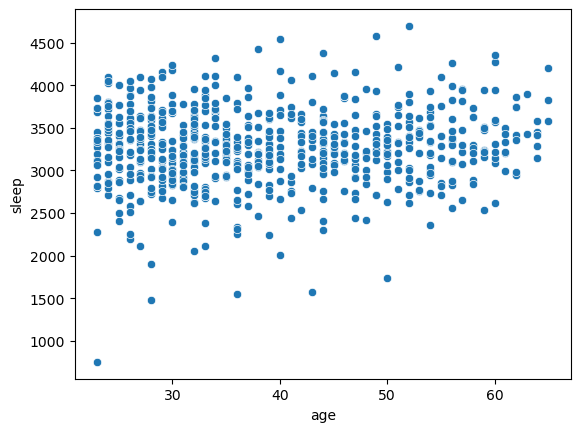

In [9]:
sns.scatterplot(data=df, y='sleep', x='age')

<AxesSubplot:xlabel='age', ylabel='sleep'>

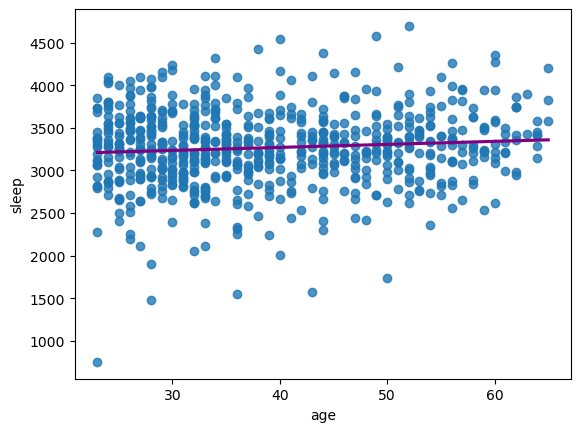

In [10]:
sns.regplot(data=df, y='sleep', x='age', ci=None, line_kws={"color": "purple"})

In [11]:
# подгонка прямой
fitted_line = smf.ols(formula='sleep~age', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

Intercept    3128.91
age             3.54
dtype: float64

# спецификация 2.1.2
$$
sleep = 3128.91 + 3.54*age
$$
С возрастом количество минут сна уменьшается на 3.54 минуты в неделю

In [12]:
# подгонка прямой
fitted_line = smf.ols(formula='sleep~-1+age', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

age    77.82
dtype: float64

# спецификация 2.1.2 (без константы)
$$
sleep = 77.82*age
$$

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df.shape

(706, 34)

<AxesSubplot:xlabel='totwrk', ylabel='sleep'>

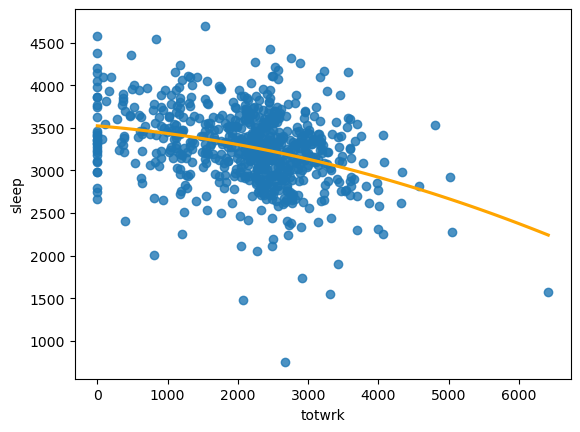

In [14]:
sns.regplot(data=df, y='sleep', x='totwrk', ci=None, order=2, line_kws={"color": "orange"})

In [15]:
# подгонка параболы
fitted_pol = smf.ols(formula='sleep~totwrk+I(totwrk**2)', data=df).fit()
# коэффициенты с округлением
fitted_pol.params.round(2)

Intercept         3523.59
totwrk              -0.07
I(totwrk ** 2)      -0.00
dtype: float64

# спецификация 2.1.3
$$
sleep = 3523.59 - 0.07*totwork
$$

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df.shape

(706, 34)

<AxesSubplot:xlabel='age', ylabel='sleep'>

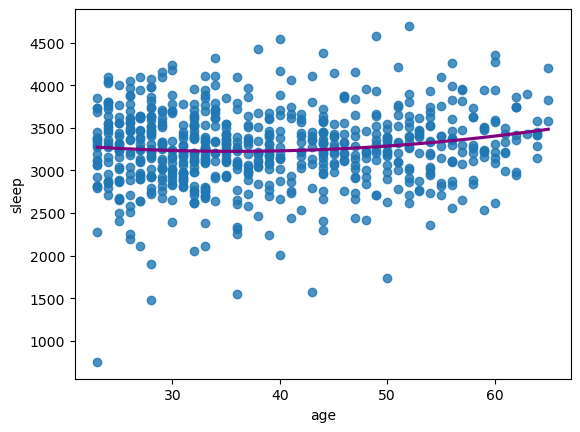

In [16]:
sns.regplot(data=df, y='sleep', x='age', ci=None, order=2, line_kws={"color": "purple"})

In [17]:
# подгонка параболы
fitted_pol = smf.ols(formula='sleep~age+I(age**2)', data=df).fit()
# коэффициенты с округлением
fitted_pol.params.round(2)

Intercept      3608.03
age             -21.49
I(age ** 2)       0.30
dtype: float64

# спецификация 2.1.4
$$
sleep = 3608.03 - 21.49*age + 0.3*(age)^2
$$

In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df.shape

(706, 34)

In [18]:
# подгонка плоскости
fitted_plane = smf.ols(formula='sleep~totwrk+age', data=df).fit()
# коэффициенты с округлением
fitted_plane.params.round(2)

Intercept    3469.20
totwrk         -0.15
age             2.92
dtype: float64

# спецификация 2.1.5
$$
sleep = 3469.2 - 0.15*totwork + 2.92*age
$$

In [19]:
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# stats models: regression fitting
import statsmodels.formula.api as smf
# data visualization
import seaborn as sns

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/Labour.csv')
df

,capital,labour,output,wage
0,2.606563,184,9.250759,43.080307
1,1.323237,91,3.664310,27.780016
2,22.093692,426,28.781516,44.467748
3,10.737851,72,4.124642,39.734710
4,1.161365,46,2.890150,34.650709
...,...,...,...,...
564,2.625403,20,1.424376,33.477545
565,1.276386,61,2.109048,26.300732
566,1.953869,117,6.241870,41.153979
567,1.318527,46,7.902237,66.720139


<AxesSubplot:xlabel='capital', ylabel='output'>

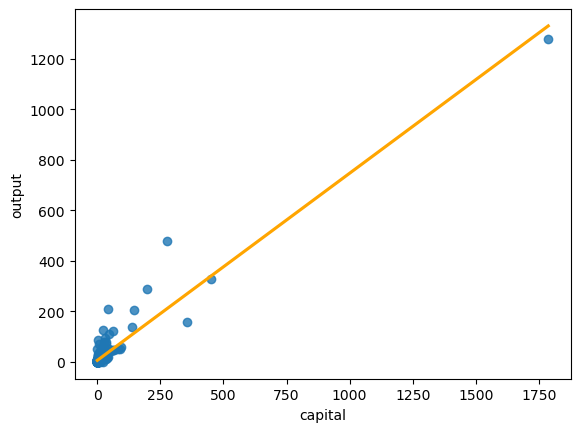

In [21]:
sns.regplot(data=df, x='capital', y='output', ci=None, line_kws={"color": "orange"})

In [42]:
# подгонка прямой
fitted_line = smf.ols(formula='output~capital', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

Intercept    6.19
capital      0.74
dtype: float64

# спецификация 2.2.1
$$
output = 6.19 + 0.74*capital
$$

In [22]:
# подгонка прямой
fitted_line = smf.ols(formula='output~-1+capital', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

capital    0.75
dtype: float64

# спецификация 2.2.1 (без константы)
$$
output = 0.75*capital
$$

<AxesSubplot:xlabel='capital', ylabel='output'>

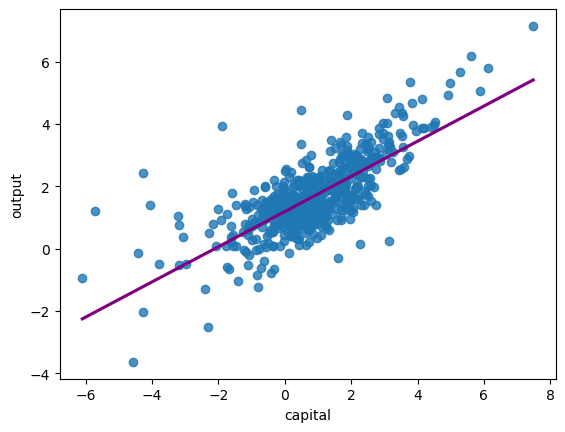

In [23]:
sns.regplot(x=np.log(df['capital']), y=np.log(df['output']), ci=None, line_kws={"color": "purple"})

In [24]:
# подгонка прямой
fitted_line = smf.ols(formula='np.log(output)~np.log(capital)', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

Intercept          1.19
np.log(capital)    0.56
dtype: float64

# Спецификация
$$
output = 1.19 +0.56*log(capital)
$$

In [25]:
# подгонка прямой
fitted_line = smf.ols(formula='np.log(output)~-1+np.log(capital)', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

np.log(capital)    0.88
dtype: float64

# Спецификация
$$
output = 0.88*log(capital)
$$

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/Labour.csv')
df.shape

(569, 4)

<AxesSubplot:xlabel='labour', ylabel='output'>

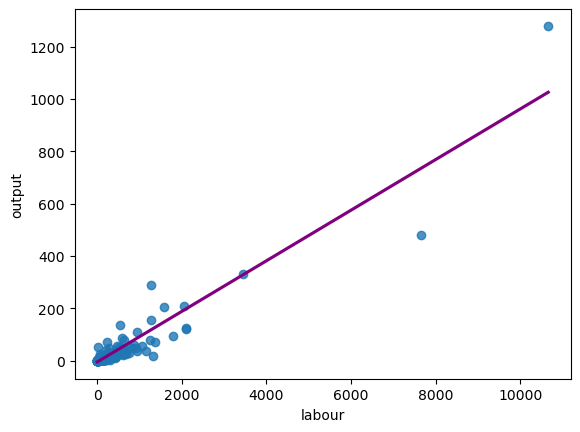

In [27]:
sns.regplot(data=df, x='labour', y='output', ci=None, line_kws={"color": "purple"})

In [28]:
# подгонка прямой
fitted_line = smf.ols(formula='output~labour', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

Intercept   -4.72
labour       0.10
dtype: float64

# Спецификация 2.2.2
$$
output= -4.72+0.1*labour
$$

In [50]:
# подгонка прямой
fitted_line = smf.ols(formula='output~-1+labour', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

labour    0.09
dtype: float64

# Спецификация 2.2.2 (без константы)
$$
output= 0.09*labour
$$

<AxesSubplot:xlabel='labour', ylabel='output'>

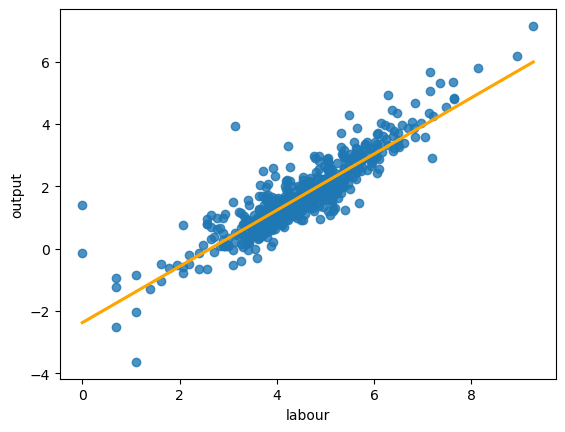

In [29]:
sns.regplot(x=np.log(df['labour']), y=np.log(df['output']), ci=None, line_kws={"color": "orange"})

In [53]:
# подгонка прямой
fitted_line = smf.ols(formula='np.log(output)~np.log(labour)', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

Intercept        -2.38
np.log(labour)    0.90
dtype: float64

# Спецификация 2.2.2
$$
output= -2.38+0.9*labour
$$

In [30]:
# подгонка прямой
fitted_line = smf.ols(formula='np.log(output)~-1+np.log(labour)', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

np.log(labour)    0.41
dtype: float64

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/Labour.csv')
df.shape

(569, 4)

<AxesSubplot:xlabel='capital', ylabel='output'>

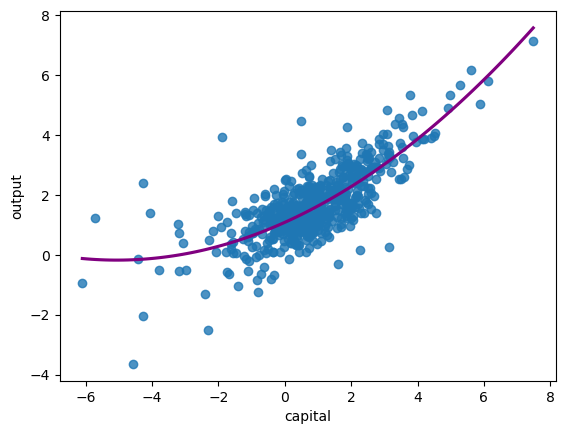

In [32]:
sns.regplot(x=np.log(df['capital']), y=np.log(df['output']), ci=None, order=2, line_kws={"color": "purple"})

In [62]:
# подгонка прямой
fitted_line = smf.ols(formula='np.log(output)~np.log(capital)+I(np.log(capital)**2)', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

Intercept                  1.09
np.log(capital)            0.50
I(np.log(capital) ** 2)    0.05
dtype: float64

# спецификация 2.2.3
$$
output= 1.09 + 0.5*log(capital) + 0.5*log^2(capital)
$$

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/Labour.csv')
df.shape

(569, 4)

<AxesSubplot:xlabel='labour', ylabel='output'>

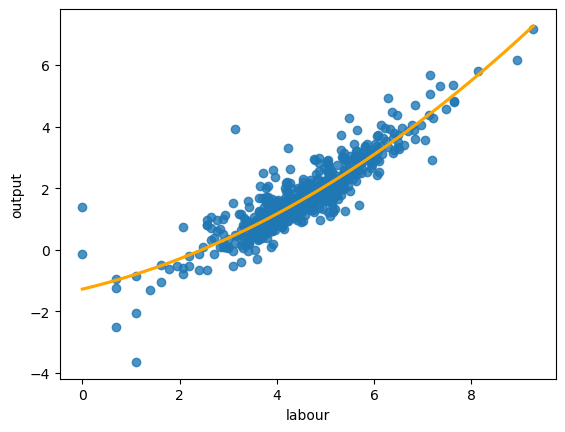

In [34]:
sns.regplot(x=np.log(df['labour']), y=np.log(df['output']), ci=None, order=2, line_kws={"color": "orange"})

In [65]:
# подгонка прямой
fitted_line = smf.ols(formula='np.log(output)~np.log(labour)+I(np.log(labour)**2)', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

Intercept                -1.28
np.log(labour)            0.37
I(np.log(labour) ** 2)    0.06
dtype: float64

# спецификация 2.2.4
$$
output= -1.28 + 0.37*log(labour) + 0.06*log^2(labour)
$$